# Importing libraries

In [1]:
import os
import cv2
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import keras
import tensorflow

from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.applications import VGG19
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, recall_score, precision_score, f1_score 

# Defining data paths

In [2]:
train_path = r'F:\Prism Solution Pvt limited\Youtube video\VGG19 architecture & implementation\Data\training'
test_path = r'F:\Prism Solution Pvt limited\Youtube video\VGG19 architecture & implementation\Data\testing'
val_path = r'F:\Prism Solution Pvt limited\Youtube video\VGG19 architecture & implementation\Data\validation'

# Converting image to pixels

In [3]:
for folder in os.listdir(train_path):
    sub_path = train_path + "/" + folder
    
    print(folder)
    for i in range(2):
        temp_path = os.listdir(sub_path)[i]
        temp_path = sub_path + "/" + temp_path
        img = mpimg.imread(temp_path)
        imgplot = plt.imshow(img)
        plt.show()

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'F:\\Prism Solution Pvt limited\\Youtube video\\VGG19 architecture & implementation\\Data\\training'

In [3]:
def imagearray(path, size):
    data = []
    for folder in os.listdir(path):
        sub_path=path+"/"+folder

        for img in os.listdir(sub_path):
            image_path=sub_path+"/"+img
            img_arr=cv2.imread(image_path)
            img_arr=cv2.resize(img_arr, size)
            data.append(img_arr)
            
    return data

In [4]:
size = (250,250)

train = imagearray(train_path, size)
test = imagearray(test_path, size)
val = imagearray(val_path, size)

# Normalization

In [5]:
x_train = np.array(train)
x_test = np.array(test)
x_val = np.array(val)

In [6]:
x_train = x_train/255.0
x_test = x_test/255.0
x_val = x_val/255.0

# Defining target variables

In [7]:
def data_class(data_path, size, class_mode):
    datagen = ImageDataGenerator(rescale = 1./255)
    classes = datagen.flow_from_directory(data_path,
                                          target_size = size,
                                          batch_size = 32,
                                          class_mode = class_mode)
    return classes

In [8]:
train_class = data_class(train_path, size, 'sparse')
test_class = data_class(test_path, size, 'sparse')
val_class = data_class(val_path, size, 'sparse')

Found 3150 images belonging to 3 classes.
Found 901 images belonging to 3 classes.
Found 460 images belonging to 3 classes.


In [9]:
y_train = train_class.classes
y_test = test_class.classes
y_val = val_class.classes

In [10]:
train_class.class_indices

{'Grade-A': 0, 'Grade-B': 1, 'Grade-C': 2}

In [11]:
y_train.shape,y_test.shape,y_val.shape

((3150,), (901,), (460,))

# VGG19 Model

In [12]:
vgg = VGG19(input_shape = (250, 250, 3), weights = 'imagenet', include_top = False)

In [13]:
for layer in vgg.layers:
    layer.trainable = False

x = Flatten()(vgg.output)
prediction = Dense(3, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.summary()
model.compile(
  loss='sparse_categorical_crossentropy',
  optimizer="adam",
  metrics=['accuracy']
)

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 250, 250, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 250, 250, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 250, 250, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 125, 125, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 125, 125, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 125, 125, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 62, 62, 128)      

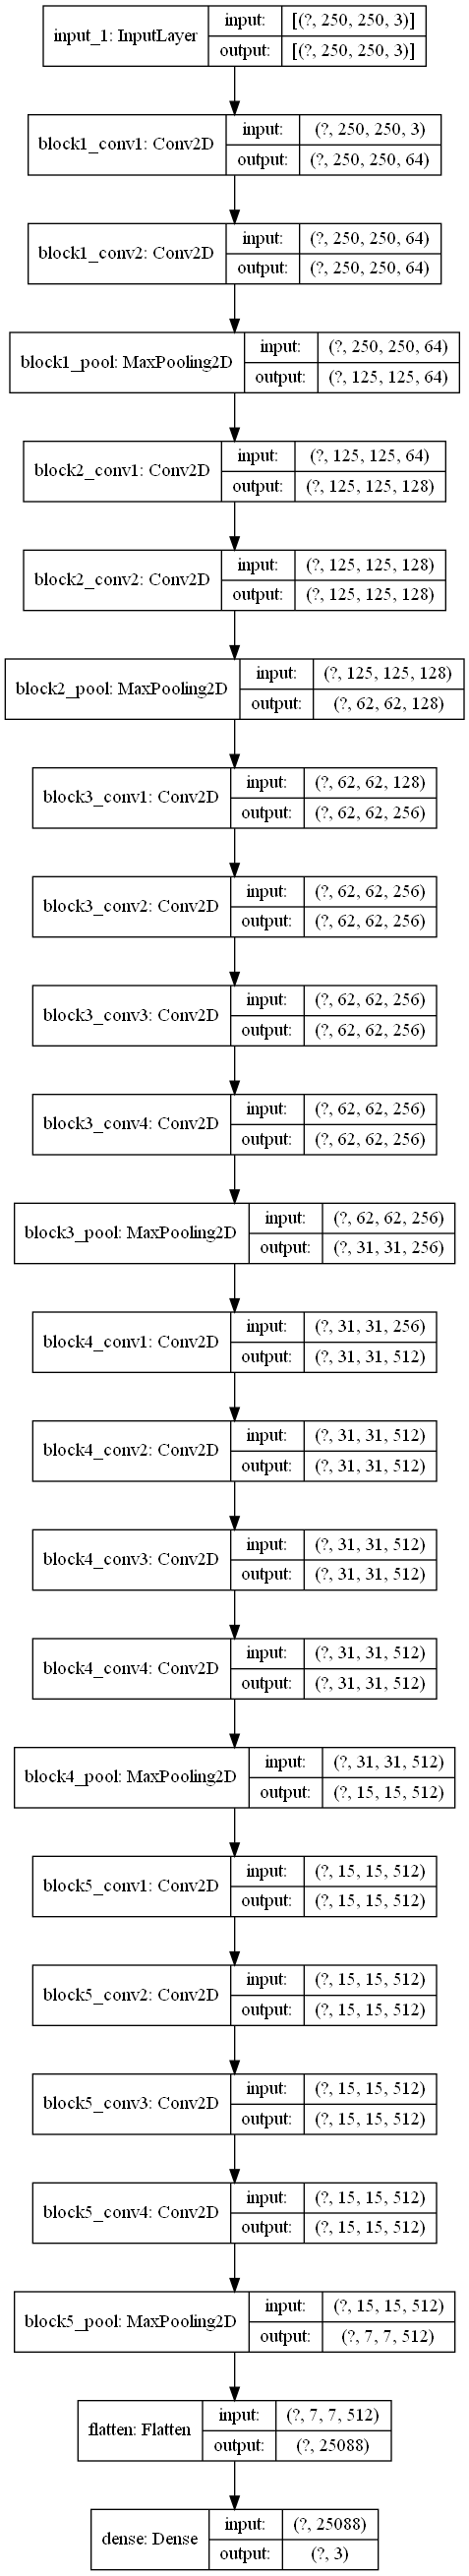

In [14]:
plot_model(model=model, show_shapes=True)

In [15]:
early_stop = EarlyStopping(monitor = 'val_loss', mode='min', verbose = 1, patience = 5)

In [18]:
history = model.fit(x_train, y_train, validation_data = (x_val, y_val), epochs = 10, callbacks=[early_stop], batch_size = 30,
                    shuffle=True)

Train on 3150 samples, validate on 460 samples
Epoch 1/10
3150/3150 [==============================] - 1681s 534ms/sample - loss: 0.7311 - accuracy: 0.7279 - val_loss: 0.4663 - val_accuracy: 0.8304
Epoch 2/10
3150/3150 [==============================] - 1484s 471ms/sample - loss: 0.3247 - accuracy: 0.8886 - val_loss: 0.3988 - val_accuracy: 0.8609
Epoch 3/10
3150/3150 [==============================] - 1430s 454ms/sample - loss: 0.2335 - accuracy: 0.9273 - val_loss: 0.3288 - val_accuracy: 0.8717
Epoch 4/10
3150/3150 [==============================] - 1439s 457ms/sample - loss: 0.1848 - accuracy: 0.9425 - val_loss: 0.3223 - val_accuracy: 0.8652
Epoch 5/10
3150/3150 [==============================] - 1477s 469ms/sample - loss: 0.1750 - accuracy: 0.9419 - val_loss: 0.2963 - val_accuracy: 0.8935
Epoch 6/10
3150/3150 [==============================] - 1559s 495ms/sample - loss: 0.1369 - accuracy: 0.9590 - val_loss: 0.2631 - val_accuracy: 0.8957
Epoch 7/10
3150/3150 [=========================

# Visualization

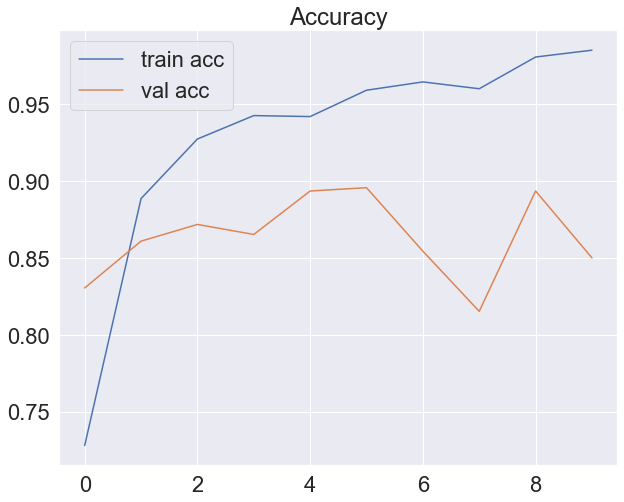

In [56]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['accuracy'], label='train acc')
plt.plot(history.history['val_accuracy'], label='val acc')
plt.legend()
plt.title('Accuracy')
plt.show()

ERROR! Session/line number was not unique in database. History logging moved to new session 162


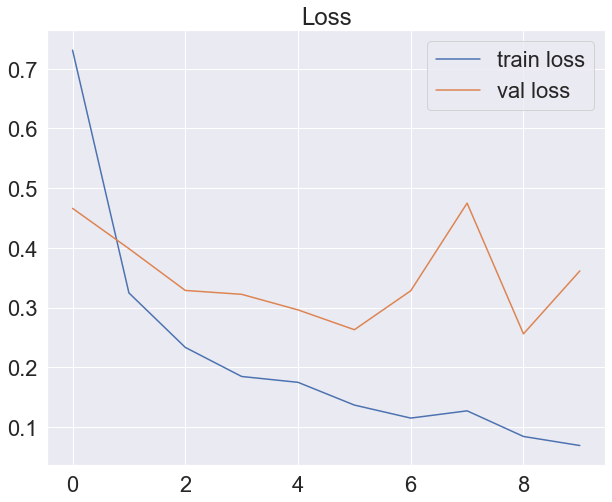

In [55]:
plt.figure(figsize=(10, 8))
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.title('Loss')
plt.show()

# Model Evaluation

In [21]:
model.evaluate(x_test, y_test, batch_size=32)

901/901 [==============================] - 375s 416ms/sample - loss: 0.5705 - accuracy: 0.8124


[0.5705316894988506, 0.8124306]

In [26]:
y_pred = model.predict(x_test)

In [27]:
y_pred=np.argmax(y_pred,axis=1)

In [28]:
print(classification_report(y_pred,y_test))

ERROR! Session/line number was not unique in database. History logging moved to new session 145
              precision    recall  f1-score   support

           0       0.82      0.90      0.86       275
           1       0.64      0.84      0.73       231
           2       0.97      0.74      0.84       395

    accuracy                           0.81       901
   macro avg       0.81      0.82      0.81       901
weighted avg       0.84      0.81      0.82       901



# Confusion Matrix

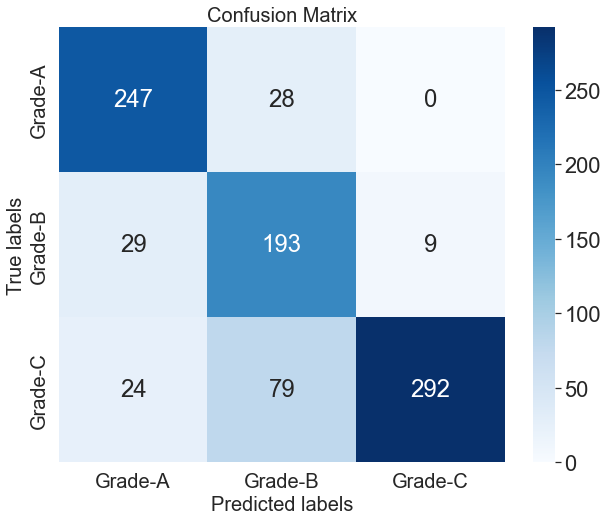

In [46]:
cm = confusion_matrix(y_pred,y_test)

plt.figure(figsize=(10, 8))
ax = plt.subplot()
sns.set(font_scale=2.0)
sns.heatmap(cm, annot=True, fmt='g', cmap="Blues", ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels', fontsize=20);ax.set_ylabel('True labels', fontsize=20); 
ax.set_title('Confusion Matrix', fontsize=20); 
ax.xaxis.set_ticklabels(['Grade-A', 'Grade-B', 'Grade-C'], fontsize=20); ax.yaxis.set_ticklabels(['Grade-A', 'Grade-B', 'Grade-C'], fontsize=20);

In [48]:
f1_score(y_test, y_pred, average='micro')

0.8124306326304107

ERROR! Session/line number was not unique in database. History logging moved to new session 156


In [53]:
recall_score(y_test, y_pred, average='weighted')

0.8124306326304107

In [52]:
precision_score(y_test, y_pred, average='micro')

0.8124306326304107

# Saving Model

In [58]:
model.save("E:/Friend Works/Rozina Riaz/Classification_model.h5")

ERROR! Session/line number was not unique in database. History logging moved to new session 165
